# Projeto de Análise de Ações

* O <strong>objetivo</strong> é conseguir a partir de uma requisição do usuário, por meio de um input, traçar a rentabilidade dos ultimos 12 meses do ativo, e comprar sua rentabilidade com o indice IBOV e a rentabilidade do setor <br><br>

* Decidi utilizar o site yahoo finance como base das informações, devida a estrutura das suas páginas, facilitarem a consulta por Ticker de ação, precisando apenas acrescentar o '.SA' para acessar a página do ativo específico diretamente <br><br>

* As explicações dos motivos de cada código estarão imediatamente acima da célula correspondente, tentando ao máximo, traçar uma linha de pensamento que utilizei para chegar no objetivo proposto <br><br>


### bibliotecas utilizadas no projeto

In [444]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import date
import dateutil.relativedelta

### Puxar informações de Setor e Industria do site Yahoo Finance

- A principio eu tenho uma base com os tickers de diversas ações listadas na bolsa, como preciso também das informações do setor, irei realizar um procedimento de scraping no site Yahoo Finance, para pegar as informações de 'Sector' e 'Industry', de cada ativo desta base

In [214]:
base_inicial = pd.read_excel('tickers_setores_yf.xlsx')
display(base_inicial)

,TICKER,Sector,Industry
0,AALR3,NaN,NaN
1,ABCB4,NaN,NaN
2,ABEV3,NaN,NaN
3,ADHM3,NaN,NaN
4,AERI3,NaN,NaN
...,...,...,...
569,WIZS3,NaN,NaN
570,WLMM3,NaN,NaN
571,WLMM4,NaN,NaN
572,WSON33,NaN,NaN


* Para isso irei realizar um for por todas os ativos da minha base inicial e irei criar um dicionário, com o ticker como chave e o setor e industria como itens, caso o ticker não encontre essas informações ou a página com o ticker não esteja disponível, irei considerar como não informado na minha base <br><br>

* Esse processo será bem moroso, devido a necessidade de acessar uma pagína cada um dos 573 tickers que possuo, deixarei o código apenas para consulta, porém ja deixarei o arquivo Base_Ações.xlsx disponível caso prefira pular essa etapa

In [228]:
driver = webdriver.Chrome()
driver.get("https://finance.yahoo.com/")

dict_base = {}

for ativo in base_inicial['TICKER']:
    dict_ativo = ativo
    pesquisar_ativo = driver.get(f"https://finance.yahoo.com/quote/{ativo}.SA/profile?p={ativo}.SA")
    time.sleep(3)
    try:
        dict_setor = driver.find_element(By.XPATH, '//*[@id="Col1-0-Profile-Proxy"]/section/div[1]/div/div/p[2]/span[2]').text
    except:
        dict_setor = 'Não informado'
    try:
        dict_industria = driver.find_element(By.XPATH, '//*[@id="Col1-0-Profile-Proxy"]/section/div[1]/div/div/p[2]/span[4]').text
    except:
        dict_industria = 'Não informado'
    dict_base[f'{ativo}'] = [f'{dict_setor};{dict_industria}']

print(dict_base)

{'AALR3': ['Healthcare;Diagnostics & Research'], 'ABCB4': ['Financial Services;Banks—Regional'], 'ABEV3': ['Consumer Defensive;Beverages—Brewers'], 'ADHM3': ['Não informado;Não informado'], 'AERI3': ['Industrials;Specialty Industrial Machinery'], 'AESB3': ['Utilities;Utilities—Renewable'], 'AFLT3': ['Utilities;Utilities—Regulated Electric'], 'AGRO3': ['Consumer Defensive;Farm Products'], 'AHEB3': ['Consumer Cyclical;Travel Services'], 'AHEB5': ['Consumer Cyclical;Travel Services'], 'AHEB6': ['Consumer Cyclical;Travel Services'], 'ALLD3': ['Technology;Software—Application'], 'ALPA3': ['Consumer Cyclical;Footwear & Accessories'], 'ALPA4': ['Consumer Cyclical;Footwear & Accessories'], 'ALPK3': ['Industrials;Infrastructure Operations'], 'ALSO3': ['Real Estate;Real Estate Services'], 'ALUP11': ['Utilities;Utilities—Renewable'], 'ALUP3': ['Utilities;Utilities—Renewable'], 'ALUP4': ['Utilities;Utilities—Renewable'], 'AMAR3': ['Consumer Cyclical;Apparel Retail'], 'AMBP3': ['Industrials;Waste M

* Com o dicionário pronto, irei convertê-lo em um data frame para melhor analisar e tratá-lo

In [391]:
dict_base_df = pd.DataFrame.from_dict(dict_base, orient='index')
display(base_ativos_df)

,Unnamed: 0,0
0,AALR3,Healthcare;Diagnostics & Research
1,ABCB4,Financial Services;Banks—Regional
2,ABEV3,Consumer Defensive;Beverages—Brewers
3,ADHM3,Não informado;Não informado
4,AERI3,Industrials;Specialty Industrial Machinery
...,...,...
569,WIZS3,Financial Services;Insurance Brokers
570,WLMM3,Consumer Cyclical;Auto & Truck Dealerships
571,WLMM4,Consumer Cyclical;Auto & Truck Dealerships
572,WSON33,Não informado;Não informado


* Com o data frame criado irei tratá-lo segundo as minhas necessidades, separando definitivamente a coluna 0, em duas colunas nomeadas como 'Setor' e 'Industria', renomeado a coluna 'Ticker' e tirando a mesma como indexador

In [392]:
dict_base_df['Setor'], dict_base_df['Industria'] = dict_base_df[0].str.split(';', 1).str
dict_base_df.drop(columns =[0], inplace = True)
dict_base_df.reset_index(inplace=True)
dict_base_df.rename(columns={'index': 'Ticker'}, inplace=True)
display(dict_base_df)

<ipython-input-392-334b30a38775>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  dict_base_df['Setor'], dict_base_df['Industria'] = dict_base_df[0].str.split(';', 1).str


,Ticker,Setor,Industria
0,AALR3,Healthcare,Diagnostics & Research
1,ABCB4,Financial Services,Banks—Regional
2,ABEV3,Consumer Defensive,Beverages—Brewers
3,ADHM3,Não informado,Não informado
4,AERI3,Industrials,Specialty Industrial Machinery
...,...,...,...
569,WIZS3,Financial Services,Insurance Brokers
570,WLMM3,Consumer Cyclical,Auto & Truck Dealerships
571,WLMM4,Consumer Cyclical,Auto & Truck Dealerships
572,WSON33,Não informado,Não informado


* Verifiquei ao final do processo a ausencia de uma linha para o ticker 'VIIA3', por esse motivo irei incluí-lo conforme abaixo, no final da minha tabela

In [393]:
dict_base_df.loc[len(dict_base_df)] = ['VIIA3', 'Consumer Cyclical', 'Specialty Retail']
display(dict_base_df)

,Ticker,Setor,Industria
0,AALR3,Healthcare,Diagnostics & Research
1,ABCB4,Financial Services,Banks—Regional
2,ABEV3,Consumer Defensive,Beverages—Brewers
3,ADHM3,Não informado,Não informado
4,AERI3,Industrials,Specialty Industrial Machinery
...,...,...,...
570,WLMM3,Consumer Cyclical,Auto & Truck Dealerships
571,WLMM4,Consumer Cyclical,Auto & Truck Dealerships
572,WSON33,Não informado,Não informado
573,YDUQ3,Consumer Defensive,Education & Training Services


* Analisando o data frame pronto identifiquei duas linhas na colunas setor Vazias e 99 com o texto 'Não informado'. Por motivos de simplificação irei apenas excluí-los

In [394]:
dict_base_df.info()
print( '-' * 20)
dict_base_df.groupby(['Setor']).size()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     575 non-null    object
 1   Setor      575 non-null    object
 2   Industria  575 non-null    object
dtypes: object(3)
memory usage: 18.0+ KB
--------------------


Setor
                           2
Basic Materials           40
Communication Services    13
Consumer Cyclical         88
Consumer Defensive        31
Energy                    12
Financial Services        73
Healthcare                21
Industrials               67
Não informado             99
Real Estate               34
Technology                13
Utilities                 82
dtype: int64

In [395]:
dict_base_df = dict_base_df.drop(dict_base_df[dict_base_df.Setor == ''].index)
dict_base_df = dict_base_df.drop(dict_base_df[dict_base_df.Setor == 'Não informado'].index)
dict_base_df.info()
print( '-' * 20)
dict_base_df.groupby(['Setor']).size()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 574
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     474 non-null    object
 1   Setor      474 non-null    object
 2   Industria  474 non-null    object
dtypes: object(3)
memory usage: 14.8+ KB
--------------------


Setor
Basic Materials           40
Communication Services    13
Consumer Cyclical         88
Consumer Defensive        31
Energy                    12
Financial Services        73
Healthcare                21
Industrials               67
Real Estate               34
Technology                13
Utilities                 82
dtype: int64

* Feito os tratamentos irei transformar esse data frame em uma arquivo excel (disponivel nos arquivos do projeto)

In [396]:
dict_base_df.to_excel('Base_Ações.xlsx', encoding='cp1252', index=False)

* Análise da distrobuição final dos ativos por setor

Text(0, 0.5, '')

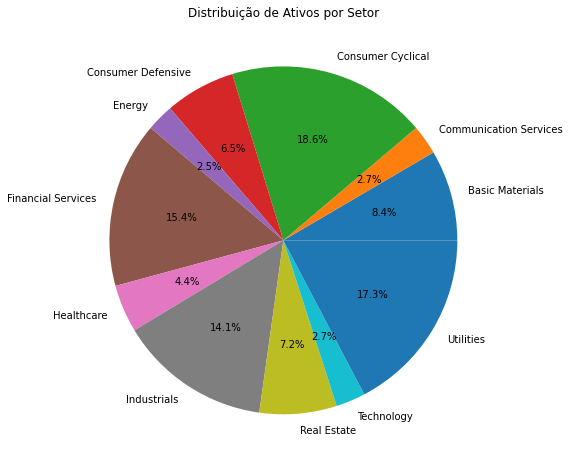

In [408]:
grafico_setores = dict_base_df.groupby(['Setor']).size().plot.pie(y='Ativos/Setor', legend=False, title='Distribuição de Ativos por Setor', figsize=(18, 8), autopct="%.1f%%")
grafico_setores.set_ylabel('')

### Criando um campo para informação do Ativo a ser análisado

In [566]:
ativo_input = input('Digite o Ticker do Ativo: ')
quantidade = input('Informe a Quantidade que possui: ')

Digite o Ticker do Ativo: ABEV3
Informe a Quantidade que possui: 20000


* Tratando a informação passada pelo usuário para as análises

In [567]:
ativo_input = ativo_input.upper()
ativo_input = ativo_input.strip()
quantidade = quantidade.upper()
quantidade = quantidade.strip()

* Criando uma regra para puxar as informações do ativo solicitado no site do Yahoo Finance, definindo como período de consulta os ultimos 12 meses

In [568]:
ativo_df = pd.DataFrame()
end = date.today()
start =  end - dateutil.relativedelta.relativedelta(years=1)

try:
    ativo_df[ativo_input] = web.DataReader(f'{ativo_input}.SA', data_source='yahoo', start= f'{start}', end= f'{end}')['Adj Close']
    ativo_df = ativo_df.ffill()
    print(ativo_df.info())
    display(ativo_df)
except:
    print('Ativo não encontrado')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-04 to 2022-01-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABEV3   249 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None


,ABEV3
Date,
2021-01-04,14.827890
2021-01-05,15.143991
2021-01-06,15.450509
2021-01-07,15.373878
2021-01-08,15.833660
...,...
2021-12-28,15.520000
2021-12-29,15.450000
2021-12-30,15.420000


* Puxando do site Yahoo Finance, as informações referente ao indice IBOV para comparação

In [571]:
ibov_df = web.DataReader('^BVSP', data_source='yahoo', start= f'{start}', end= f'{end}')
print(ibov_df.info())
display(ibov_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-04 to 2022-01-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       249 non-null    float64
 1   Low        249 non-null    float64
 2   Open       249 non-null    float64
 3   Close      249 non-null    float64
 4   Volume     249 non-null    int64  
 5   Adj Close  249 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.6 KB
None


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,120354.000000,118062.000000,119024.00000,118558.000000,8741400,118558.000000
2021-01-05,119790.000000,116756.000000,118835.00000,119223.000000,9257100,119223.000000
2021-01-06,120924.000000,118917.000000,119377.00000,119851.000000,11638200,119851.000000
2021-01-07,121983.000000,119101.000000,119103.00000,121956.000000,11774800,121956.000000
2021-01-08,125324.000000,122386.000000,122387.00000,125077.000000,11085800,125077.000000
...,...,...,...,...,...,...
2021-12-28,105652.000000,104503.000000,105555.00000,104864.000000,7509000,104864.000000
2021-12-29,105190.000000,103851.000000,104863.00000,104107.000000,6590000,104107.000000
2021-12-30,105269.000000,104106.000000,104106.00000,104822.000000,11138100,104822.000000


* Colocando os valores do indice IBOV e do ativo selecionado na mesma base, para comparação, e plotando o gráfico com os resultados

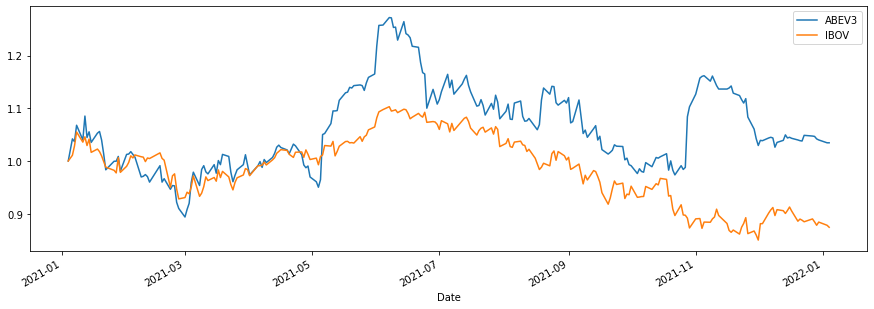

In [572]:
ativo_df_norm = ativo_df / ativo_df.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

ativo_df_norm[f'{ativo_input}'].plot(figsize=(15, 5), label=f'{ativo_input}')
ibov_df_norm['Adj Close'].plot(label='IBOV')
plt.legend()

* utilizando como exemplo o ativo ABEV3, podemos observar que o papel teve um desempenho superior ao Ibovespa, com rentabilidade de 3,5%.

In [573]:
rentabilidade_ativo = ativo_df_norm[f'{ativo_input}'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1 
print('Rentabilidade do Ativo {:.1%}'.format(rentabilidade_ativo))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))

Rentabilidade do Ativo 3.5%
Rentabilidade do Ibovespa -12.6%


### Adicionando a análise o desempenho do setor

* Com a tabela do setor criado irei realizar um filtro para pegar apenas, os papeis cujo setor seja o mesmo do ativo selecionado. Irei criar um data frame auxiliar com esses papéis

In [574]:
print('Ativo Selecionado: {}'.format(ativo_input))

setor = dict_base_df.loc[dict_base_df['Ticker'] == ativo_input, 'Setor'].iloc[0]
print('O setor a ser analisado será o: {}'.format(setor))

# identificando a linha com o ativo na base
linha_df = dict_base_df.loc[dict_base_df['Ticker'] == ativo_input, :]
display(linha_df)

# criando df auxiliar com os ativos do setor
setores_df = dict_base_df.loc[dict_base_df['Setor'] == setor, :]
display(setores_df)
setores_df.info()

Ativo Selecionado: ABEV3
O setor a ser analisado será o: Consumer Defensive


,Ticker,Setor,Industria
2,ABEV3,Consumer Defensive,Beverages—Brewers


,Ticker,Setor,Industria
2,ABEV3,Consumer Defensive,Beverages—Brewers
7,AGRO3,Consumer Defensive,Farm Products
21,ANIM3,Consumer Defensive,Education & Training Services
26,ASAI3,Consumer Defensive,Grocery Stores
35,BAHI3,Consumer Defensive,Education & Training Services
38,BAUH4,Consumer Defensive,Packaged Foods
48,BEEF3,Consumer Defensive,Farm Products
70,BOBR3,Consumer Defensive,Household & Personal Products
71,BOBR4,Consumer Defensive,Household & Personal Products
83,BRFS3,Consumer Defensive,Packaged Foods


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 2 to 573
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     31 non-null     object
 1   Setor      31 non-null     object
 2   Industria  31 non-null     object
dtypes: object(3)
memory usage: 992.0+ bytes


* Com isso irei criar um novo df para apresentar os resultados de cada ativo do df auxiliar durante os ultimos 12 meses, irei tratar as informações e se sobrar colunas com valores Nan, irei exclui-las

In [576]:
setores_comp = pd.DataFrame()

for ticker in setores_df['Ticker']:
    setores_comp[ticker]= web.DataReader(f'{ticker}.SA', data_source='yahoo', start= f'{start}', end= f'{end}')['Adj Close']
setores_comp = setores_comp.ffill()
setores_comp.fillna(method='ffill')
setores_comp.fillna(method='bfill')
setores_comp = setores_comp.dropna(axis=1)
print(setores_comp.info())
display(setores_comp)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-01-04 to 2022-01-04
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ABEV3   249 non-null    float64
 1   AGRO3   249 non-null    float64
 2   ANIM3   249 non-null    float64
 3   BAHI3   249 non-null    float64
 4   BAUH4   249 non-null    float64
 5   BEEF3   249 non-null    float64
 6   BOBR3   249 non-null    float64
 7   BOBR4   249 non-null    float64
 8   BRFS3   249 non-null    float64
 9   CAML3   249 non-null    float64
 10  COGN3   249 non-null    float64
 11  CRFB3   249 non-null    float64
 12  FRTA3   249 non-null    float64
 13  HETA3   249 non-null    float64
 14  HETA4   249 non-null    float64
 15  JBSS3   249 non-null    float64
 16  JOPA3   249 non-null    float64
 17  JOPA4   249 non-null    float64
 18  MDIA3   249 non-null    float64
 19  MNDL3   249 non-null    float64
 20  MNPR3   249 non-null    float64
 21  MRFG3   249 non-null

,ABEV3,AGRO3,ANIM3,BAHI3,BAUH4,BEEF3,BOBR3,BOBR4,BRFS3,CAML3,...,MDIA3,MNDL3,MNPR3,MRFG3,NTCO3,ODER4,SEER3,SLCE3,SMTO3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.827890,22.730972,12.000000,16.400,95.865623,9.044785,1.0,2.17,21.480000,10.653061,...,33.348625,24.350000,6.94,11.908698,51.990002,10.678475,14.848992,25.384285,25.558748,33.465923
2021-01-05,15.143991,23.367439,11.943333,16.458,95.865623,8.864609,1.0,2.17,21.309999,10.848171,...,32.971241,24.360001,6.98,11.833748,51.689999,10.678475,14.702885,26.550665,25.605646,33.633251
2021-01-06,15.450509,23.658396,11.796666,16.500,95.865623,8.738486,1.0,2.19,21.250000,10.526238,...,32.623653,24.350000,6.97,11.475655,49.099998,10.678475,14.215387,26.479435,26.984411,32.294621
2021-01-07,15.373879,24.094830,11.733333,16.600,95.865623,8.693442,1.0,2.36,21.930000,10.653061,...,32.464752,24.639999,6.76,11.525621,48.480000,10.678475,14.059389,26.559566,28.213106,32.698177
2021-01-08,15.833660,23.549286,11.956666,16.798,95.697014,8.765512,1.0,2.28,21.980000,10.916458,...,33.755802,26.590000,6.95,11.667193,50.720001,11.122590,14.361637,27.912922,29.160421,33.810425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,15.520000,28.280001,8.240000,14.940,82.889999,10.550000,1.0,1.68,22.590000,10.980000,...,25.240000,33.500000,6.29,22.780001,25.400000,190.000000,10.400000,39.590908,34.349998,20.860001
2021-12-29,15.450000,28.370001,8.120000,14.990,85.989998,10.620000,1.0,1.68,22.360001,11.020000,...,25.330000,35.000000,6.25,22.920000,24.969999,190.000000,10.500000,40.318180,34.230000,20.320000
2021-12-30,15.420000,28.790001,8.400000,14.850,87.889999,10.600000,1.0,1.68,22.520000,11.380000,...,25.490000,34.939999,6.39,22.070000,25.430000,190.000000,10.490000,40.936363,34.439999,20.559999


* Irei criar uma nova coluna ao final do data frame, com a soma dos valores dos ativos, para a comparação

In [577]:
setores_comp['Total'] = setores_comp.sum(axis=1)
display(setores_comp)

,ABEV3,AGRO3,ANIM3,BAHI3,BAUH4,BEEF3,BOBR3,BOBR4,BRFS3,CAML3,...,MNDL3,MNPR3,MRFG3,NTCO3,ODER4,SEER3,SLCE3,SMTO3,YDUQ3,Total
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.827890,22.730972,12.000000,16.400,95.865623,9.044785,1.0,2.17,21.480000,10.653061,...,24.350000,6.94,11.908698,51.990002,10.678475,14.848992,25.384285,25.558748,33.465923,572.816776
2021-01-05,15.143991,23.367439,11.943333,16.458,95.865623,8.864609,1.0,2.17,21.309999,10.848171,...,24.360001,6.98,11.833748,51.689999,10.678475,14.702885,26.550665,25.605646,33.633251,576.904495
2021-01-06,15.450509,23.658396,11.796666,16.500,95.865623,8.738486,1.0,2.19,21.250000,10.526238,...,24.350000,6.97,11.475655,49.099998,10.678475,14.215387,26.479435,26.984411,32.294621,572.691219
2021-01-07,15.373879,24.094830,11.733333,16.600,95.865623,8.693442,1.0,2.36,21.930000,10.653061,...,24.639999,6.76,11.525621,48.480000,10.678475,14.059389,26.559566,28.213106,32.698177,580.172312
2021-01-08,15.833660,23.549286,11.956666,16.798,95.697014,8.765512,1.0,2.28,21.980000,10.916458,...,26.590000,6.95,11.667193,50.720001,11.122590,14.361637,27.912922,29.160421,33.810425,589.554705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,15.520000,28.280001,8.240000,14.940,82.889999,10.550000,1.0,1.68,22.590000,10.980000,...,33.500000,6.29,22.780001,25.400000,190.000000,10.400000,39.590908,34.349998,20.860001,833.340907
2021-12-29,15.450000,28.370001,8.120000,14.990,85.989998,10.620000,1.0,1.68,22.360001,11.020000,...,35.000000,6.25,22.920000,24.969999,190.000000,10.500000,40.318180,34.230000,20.320000,837.778178
2021-12-30,15.420000,28.790001,8.400000,14.850,87.889999,10.600000,1.0,1.68,22.520000,11.380000,...,34.939999,6.39,22.070000,25.430000,190.000000,10.490000,40.936363,34.439999,20.559999,841.786360


* Com o df tratado irei normaliza-lo para plotar a compração do ativo selecioando com o IBOV e com o desempenho do setor

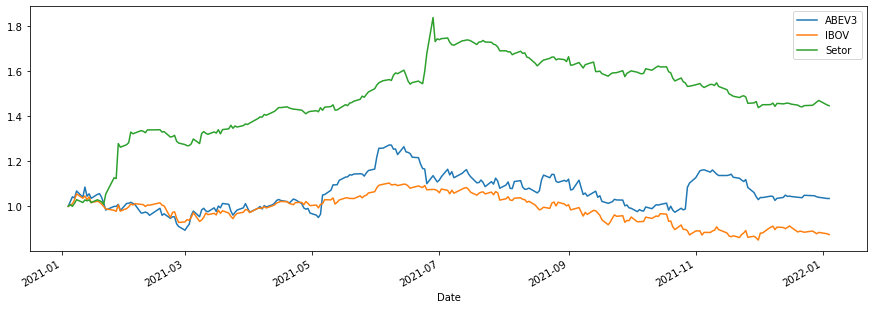

In [578]:
ativo_df_norm = ativo_df / ativo_df.iloc[0]
setores_comp_norm = setores_comp / setores_comp.iloc[0]
ibov_df_norm = ibov_df / ibov_df.iloc[0]

ativo_df_norm[f'{ativo_input}'].plot(figsize=(15, 5), label=f'{ativo_input}')
ibov_df_norm['Adj Close'].plot(label='IBOV')
setores_comp_norm['Total'].plot(label='Setor')
plt.legend()

In [579]:
rentabilidade_ativo = ativo_df_norm[f'{ativo_input}'].iloc[-1] - 1
rentabilidade_ibov = ibov_df_norm['Adj Close'].iloc[-1] - 1 
rentabilidade_setor = setores_comp_norm['Total'].iloc[-1] - 1 
print('Rentabilidade do Ativo {:.1%}'.format(rentabilidade_ativo))
print('Rentabilidade do Ibovespa {:.1%}'.format(rentabilidade_ibov))
print('Rentabilidade do Setor {:.1%}'.format(rentabilidade_setor))

Rentabilidade do Ativo 3.5%
Rentabilidade do Ibovespa -12.6%
Rentabilidade do Setor 44.6%
